In [1]:
from utils.iterative_greedy_algorithm import IG
from utils.visualization_animation import louvain_animation
from utils.communities_network import calc_nmi, communities_to_labels
from utils.utils import read_community_labels_file_reel

import networkx as nx
import matplotlib.pyplot as plt

from concurrent.futures import ThreadPoolExecutor

In [2]:
def MSIG( G , beta , inner_iterations = 20 , outer_iterations = 100 , metric = "Mod" , true_labels = None):
    
    adj_matrix = nx.to_numpy_array(G)

    best_communities = None
    best_modularity = -1
    best_nmi = 0

    msig_trace = []

    for _ in range(outer_iterations):
        communities, modularity_trace, communities_trace, animation_frames = IG(adj_matrix, inner_iterations, beta)

        if metric == "Mod":
            modularity = modularity_trace[-1]

            if modularity > best_modularity:
                best_modularity = modularity
                best_communities = communities
            
            msig_trace.append({"communities" : communities , "modularity" : modularity_trace[-1] })

        
        elif metric == "NMI":

            nmi = calc_nmi(true_labels , communities_to_labels(G , communities))

            if nmi > best_nmi:
                best_nmi = nmi
                best_communities = communities
        
            msig_trace.append({"communities" : communities , "modularity" : modularity_trace[-1] , "nmi" : nmi })
    

    return best_communities , msig_trace

In [3]:

file_path = 'data/reel/dolphins/dolphins.gml'
G = nx.read_gml(file_path)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

62

In [10]:
best_community , trace = MSIG(G , 0.5 , inner_iterations = 20 , outer_iterations = 20 , metric = "Mod" , true_labels = None)

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

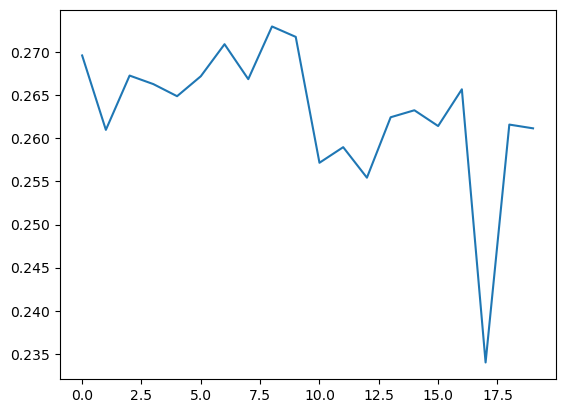

In [9]:
mod_trace = [t["modularity"] for t in trace]


plt.plot(mod_trace)

# Avec paralelisation

In [18]:
def MSIG_Parallel(G, beta, inner_iterations=20, outer_iterations=100, metric="Mod", true_labels=None):

    adj_matrix = nx.to_numpy_array(G)

    best_communities = None
    best_modularity = -1
    best_nmi = 0

    msig_trace = []

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(IG, adj_matrix, inner_iterations, beta) for _ in range(outer_iterations)]

        for future in futures:
            communities, modularity_trace, communities_trace, animation_frames = future.result()

            if metric == "Mod":
                modularity = modularity_trace[-1]

                if modularity > best_modularity:
                    best_modularity = modularity
                    best_communities = communities

                msig_trace.append({"communities": communities,
                                  "modularity": modularity_trace[-1]})

            elif metric == "NMI":

                nmi = calc_nmi(true_labels, communities_to_labels(G, communities))

                if nmi > best_nmi:
                    best_nmi = nmi
                    best_communities = communities

                msig_trace.append({"communities": communities,
                                  "modularity": modularity_trace[-1], "nmi": nmi})


    return best_communities, msig_trace

In [19]:

file_path = 'data/reel/dolphins/dolphins.gml'
G = nx.read_gml(file_path)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

62

In [20]:

best_community, trace = MSIG_Parallel(
    G, 0.5, inner_iterations=20, outer_iterations=20, metric="Mod", true_labels=None)

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG:   0%|          | 0/20 [00:00<?, ?it/s]

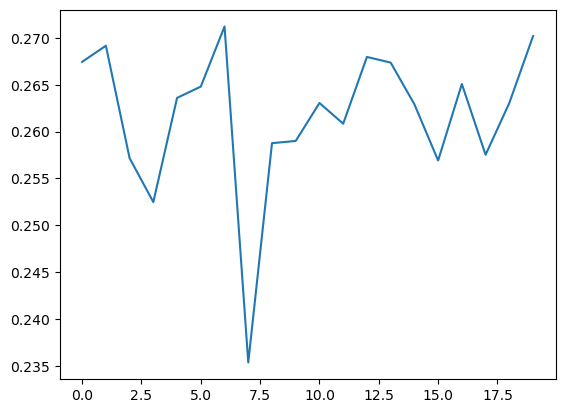

In [21]:
mod_trace = [t["modularity"] for t in trace]


plt.plot(mod_trace)